## LOGISTIC REGRESSION USING CREDIT CARD DATASET

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the file

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Input X and Output Y

In [7]:
x = dataset.iloc[:, 0:30].values
y = dataset.iloc[:, 30].values
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

#### Splitting the dataset to train and test. 75% of data is used for training the model and 25% of it is used to test the performance of our model. 

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

#### Perform Feature Scaling here values lie in different ranges.

In [16]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])

[[ 0.75665415  1.04272047  0.06657394 -1.19051456  0.05060912  0.18235446
  -1.31399333  0.58133086 -0.40257892 -0.09319222  0.16481198  1.60036637
   1.18028602 -0.24273404  1.08764203 -0.35935009 -0.76863613 -0.28881862
  -0.39536117  0.13774039 -0.34055771  0.32484688  1.13026957  0.03716189
   0.90724443  0.61754959  0.39904973 -0.21031503 -0.2607924  -0.35356699]
 [-0.2834455   0.65277143  0.27902921 -0.24476894  0.58215447  0.33956351
  -0.350961    0.37631829 -0.1526232  -0.49922983  0.18526276  0.77315062
   0.88621554  0.41739337  0.67118369 -0.01202639  0.18480279 -0.98158561
   0.36124364  0.35845646 -0.12663903  0.01884443  0.11479795 -0.39601926
  -0.53876082  1.77869575 -0.56472291 -0.02422764 -0.01672827 -0.34945825]
 [ 1.35155922 -0.21266203  0.00863513  0.89513523  0.78034353  0.59516913
  -0.11750823 -0.30293183  0.02722577 -0.090861   -0.14659342 -1.11458827
   0.6777495   2.03225147 -0.28556909  1.96808998 -0.92713443  0.11590306
   0.45044245  3.62833119  0.7323862

#### Training our Logistic Regression model. 

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)


LogisticRegression(random_state=0)

#### Predict Test Data

In [18]:
y_pred = classifier.predict(xtest)


#### Test Performance (Confusion Matrix)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[71071    11]
 [   41    79]]


#### Performance Measure (Accuracy)

In [21]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9992696834358585


#### Visualization of Performance Model

Text(0.5, 257.44, 'Predicted label')

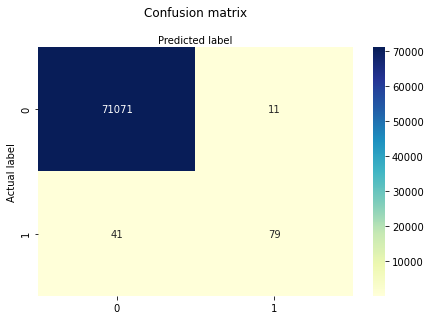

In [22]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')